## 6.1.4 Generate Random Latitudes and Longitudes
    

In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
from citipy import citipy


In [9]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])
    

-66.99409889293312 18.240588137662172
22.471247386731946 120.90141241568506
67.9479212010315 136.6418083362508
27.02441486155287 -51.021903548657264
51.77768044794436 137.42702805058468
-39.41183447375052 145.07169411358734
26.89606377489747 20.439821953787174
-70.49095799413426 145.7500612940412
59.223567023585105 -64.40339170147695
-3.0641193193313256 -72.3160762907977
68.57458181301934 -176.73289740514238
-69.8006263125121 -0.34018066412849635
5.6926084795308185 -83.91297759102194
-36.024940134770304 -87.52131423064425
52.421228593779716 -21.148472537041243
84.6975410802963 58.925674818436676
-24.865834774249137 136.815524289751
71.70799257878377 -104.35627736409546
-29.826898261108646 -77.60181413909521
-13.105934790129538 101.93938466748318
-19.945516354543727 -168.5738546285046
-10.389040153868379 116.97784936431447
4.706273460812369 0.30589010831477026
-22.136621698358653 10.637895983907242
51.964327196718386 118.1125147518739
-86.69850987012397 22.859073574721265
73.85348215544

87.028135184105 172.69988724929254
37.584033163322985 84.78315010392788
85.60477795467202 -65.03201031690803
-62.99903349509906 -139.4623505813897
-32.177171043268295 77.8508315743606
41.23648922619361 127.84949656880684
11.245080488687336 -31.725060572990145
-69.08264318905564 11.213390904590028
1.1230224484535825 -81.74522550908684
56.537248447983615 -81.5560540451271
22.984327366031636 -3.1186743656926126
-36.78589603579672 -149.2795274604585
85.3576223178546 -13.677479864834254
15.46662764516212 171.9778804229848
-4.394540738058396 98.65953062599095
40.10710135189814 99.08139384526163
-42.316957266593654 -17.59368143711839
53.96453140396187 54.16465928229371
27.966680550538968 15.111696114867868
-0.8605742506413918 174.14957747506787
-87.477964202531 -98.56820706587027
-26.653407007330706 151.43485259279157
-41.42043668600101 -178.81248079959084
-78.07885145969122 -46.85324670956933
16.628206154377423 -103.99126478098727
-78.64962177967237 -61.85679154725594
85.77956494095082 -129.

## 6.1.5 Generate Random World Cities


In [10]:
# Import citypy Module
from citipy import citipy


In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


619

## 6.2.1 - 6.2.5

### See API_practice.ipynb

## 6.2.6 Get the City Weather Data

### Import Dependencies, and Initialize an Empty List and Counters

In [12]:
# Module work from here is in the WeatherPy.ipynb file

In [13]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Cll.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


### Loop Through the List of Cities and Build the City URL

In [15]:
%%script false --no-raise-error

# **** TESING ****
# while testing, turn this cell off with the above command
# to reduce the calls to the API now that we have data for
# for charts below
#

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | chaochou
City not found. Skipping...
Processing Record 3 of Set 1 | batagay
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | gorin
Processing Record 6 of Set 1 | wonthaggi
Processing Record 7 of Set 1 | awjilah
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | iquitos
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | burica
City not found. Skipping...
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | dingle
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | palabuhanratu
City not

Processing Record 31 of Set 4 | al
City not found. Skipping...
Processing Record 32 of Set 4 | mumford
Processing Record 33 of Set 4 | malindi
Processing Record 34 of Set 4 | kargopol
Processing Record 35 of Set 4 | escanaba
Processing Record 36 of Set 4 | japura
Processing Record 37 of Set 4 | faanui
Processing Record 38 of Set 4 | sim
Processing Record 39 of Set 4 | bloemfontein
Processing Record 40 of Set 4 | sept-iles
Processing Record 41 of Set 4 | balkanabat
Processing Record 42 of Set 4 | aasiaat
Processing Record 43 of Set 4 | guerrero negro
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | kalmunai
Processing Record 46 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | qaanaaq
Processing Record 49 of Set 4 | wagar
Processing Record 50 of Set 4 | dubbo
Processing Record 1 of Set 5 | pemangkat
Processing Record 2 of Set 5 | vila velha
Processing Record 3 of Set 5 | pisco
Processin

Processing Record 24 of Set 8 | naze
Processing Record 25 of Set 8 | georgiyevka
Processing Record 26 of Set 8 | muros
Processing Record 27 of Set 8 | balimo
City not found. Skipping...
Processing Record 28 of Set 8 | namatanai
Processing Record 29 of Set 8 | tiznit
Processing Record 30 of Set 8 | port hardy
Processing Record 31 of Set 8 | kamaishi
Processing Record 32 of Set 8 | samarai
Processing Record 33 of Set 8 | kenora
Processing Record 34 of Set 8 | hokitika
Processing Record 35 of Set 8 | taoudenni
Processing Record 36 of Set 8 | baykit
Processing Record 37 of Set 8 | vila
Processing Record 38 of Set 8 | mouzouras
Processing Record 39 of Set 8 | marsh harbour
Processing Record 40 of Set 8 | cherskiy
Processing Record 41 of Set 8 | cherkasy
Processing Record 42 of Set 8 | srednekolymsk
Processing Record 43 of Set 8 | korla
Processing Record 44 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 8 | belmonte
Processing Record 46 of Set 8 | d

Processing Record 9 of Set 12 | sisimiut
Processing Record 10 of Set 12 | portland
Processing Record 11 of Set 12 | himora
City not found. Skipping...
Processing Record 12 of Set 12 | balky
Processing Record 13 of Set 12 | sangre grande
Processing Record 14 of Set 12 | basse
Processing Record 15 of Set 12 | hovd
Processing Record 16 of Set 12 | ushtobe
Processing Record 17 of Set 12 | devils lake
Processing Record 18 of Set 12 | fairfield
Processing Record 19 of Set 12 | oudtshoorn
Processing Record 20 of Set 12 | little ferry
Processing Record 21 of Set 12 | egvekinot
Processing Record 22 of Set 12 | biak
Processing Record 23 of Set 12 | kushmurun
Processing Record 24 of Set 12 | nioro
Processing Record 25 of Set 12 | kalat
Processing Record 26 of Set 12 | gravelbourg
Processing Record 27 of Set 12 | marcona
City not found. Skipping...
Processing Record 28 of Set 12 | touros
Processing Record 29 of Set 12 | mwene-ditu
Processing Record 30 of Set 12 | west wendover
Processing Record 31

In [16]:
len(city_data)


558

## 6.2.7 Create a DataFrame of City Weather Data

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,61.21,53,6,13.24,ZA,2022-09-06 14:03:45
1,Batagay,67.6333,134.6333,45.45,69,53,6.78,RU,2022-09-06 14:03:45
2,Codrington,-38.2667,141.9667,46.06,91,94,10.22,AU,2022-09-06 14:03:45
3,Gorin,51.1983,136.6669,52.88,99,100,8.99,RU,2022-09-06 14:03:46
4,Wonthaggi,-38.6044,145.5913,50.83,80,100,12.80,AU,2022-09-06 14:03:46
5,Awjilah,29.1081,21.2869,93.07,26,0,15.10,LY,2022-09-06 14:03:46
6,Hobart,-42.8794,147.3294,48.06,88,75,0.00,AU,2022-09-06 14:00:24
7,Iqaluit,63.7506,-68.5145,40.69,93,100,1.99,CA,2022-09-06 14:00:18
8,Iquitos,-3.7481,-73.2472,80.64,89,75,4.61,PE,2022-09-06 14:03:47
9,Hermanus,-34.4187,19.2345,62.80,63,8,8.39,ZA,2022-09-06 14:03:47


In [18]:
new_column_order = [
    "City", "Country", "Date", 
    "Lat", "Lng", "Max Temp", 
    "Humidity", "Cloudiness", "Wind Speed"
]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2022-09-06 14:03:45,-34.5322,20.0403,61.21,53,6,13.24
1,Batagay,RU,2022-09-06 14:03:45,67.6333,134.6333,45.45,69,53,6.78
2,Codrington,AU,2022-09-06 14:03:45,-38.2667,141.9667,46.06,91,94,10.22
3,Gorin,RU,2022-09-06 14:03:46,51.1983,136.6669,52.88,99,100,8.99
4,Wonthaggi,AU,2022-09-06 14:03:46,-38.6044,145.5913,50.83,80,100,12.80
5,Awjilah,LY,2022-09-06 14:03:46,29.1081,21.2869,93.07,26,0,15.10
6,Hobart,AU,2022-09-06 14:00:24,-42.8794,147.3294,48.06,88,75,0.00
7,Iqaluit,CA,2022-09-06 14:00:18,63.7506,-68.5145,40.69,93,100,1.99
8,Iquitos,PE,2022-09-06 14:03:47,-3.7481,-73.2472,80.64,89,75,4.61
9,Hermanus,ZA,2022-09-06 14:03:47,-34.4187,19.2345,62.80,63,8,8.39


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


## 6.3.1 Plot Latitude vs. Temperature
### Get Data for Plotting

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Set up compatability for Dark or Light Mode on Git
plt.style.use('default')


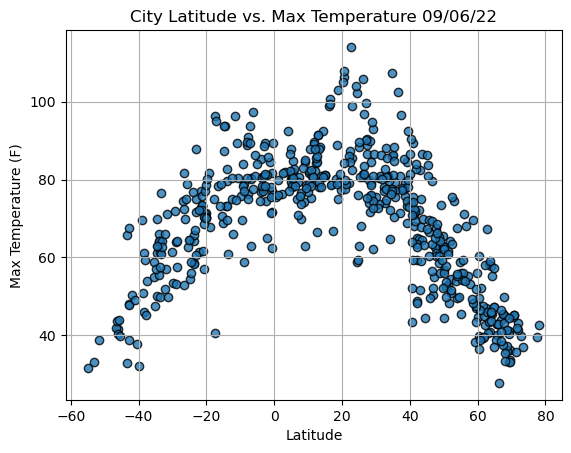

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


## 6.3.2 Plot Latitude vs. Humidity

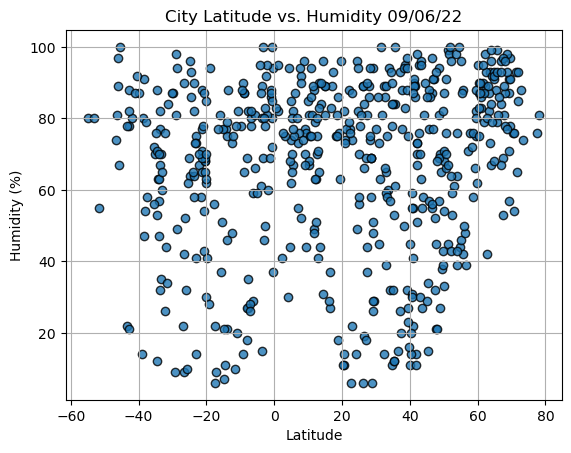

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


## 6.3.3 Plot Latitude vs. Cloudiness

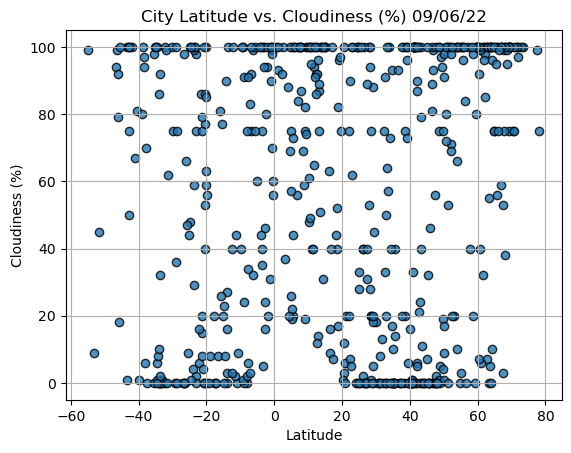

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()


## 6.3.4 Plot Latitude vs. Wind Speed

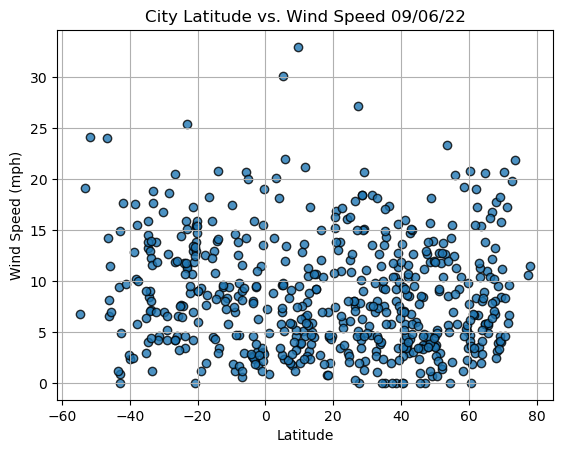

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()


## 6.4.1 Use Linear Regression to Find the Relationship Between Variables
This is a practice section covered in the random_numbers notebook.

## 6.4.2 Find the Correlation Between Latitude and Maximum Temperature


In [67]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
        

### Create the Hemisphere DataFrames


In [68]:
index13 = city_data_df.loc[13]
index13


City                  Yellowknife
Country                        CA
Date          2022-09-06 14:00:00
Lat                        62.456
Lng                     -114.3525
Max Temp                    46.92
Humidity                       93
Cloudiness                    100
Wind Speed                  17.27
Name: 13, dtype: object

In [69]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere


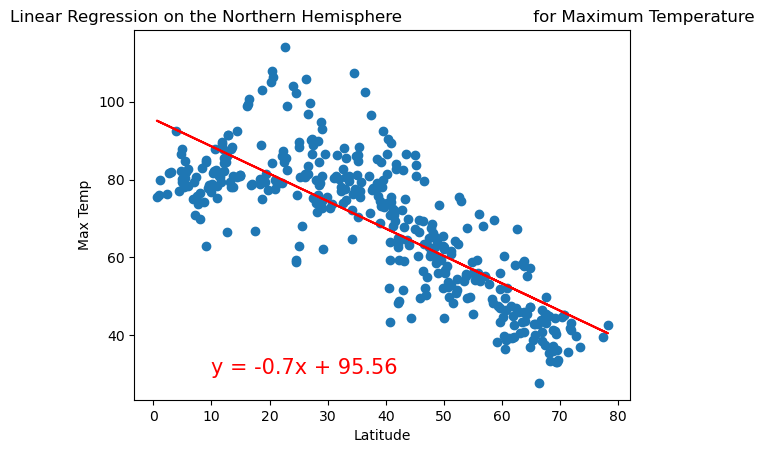

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,30))


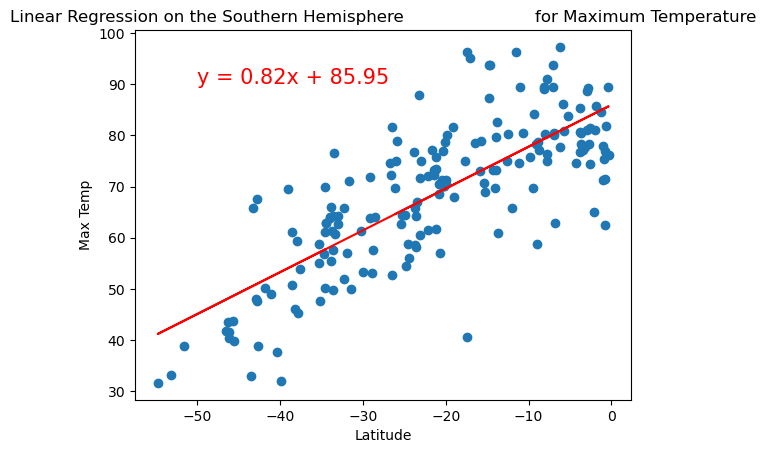

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))
